In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("used_car_data.csv")

In [6]:
df = df.replace("null",np.nan)

In [7]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [12]:
# drop null values
df = df.dropna() 

In [ ]:
df

In [26]:
df["Power"] = df["Power"].apply(lambda x:x.split(" ")[0])
df = df.replace("null", np.nan)

In [35]:
power_mean = df["Power"][df["Power"]!="null"].apply(lambda x:float(x)).mean()
df["Power"] = df["Power"].fillna(power_mean)
df["Mileage"] = df["Mileage"].apply(lambda x:float(x.split(" ")[0]))
df["Engine"] = df["Engine"].apply(lambda x:float(x.split(" ")[0]))

In [37]:
df["Kilometers_Driven"] = df["Kilometers_Driven"].replace(df["Kilometers_Driven"].max(), 65000)

In [51]:
df["Transmission"] = df["Transmission"].map({"Manual":0,
                             "Automatic":1})

df["Owner_Type"] = df["Owner_Type"].map({
    "First":1, "Second":2, "Third":3, "Fourth & Above":4})

In [56]:
df["Fuel_Type"] = df["Fuel_Type"].map({"CNG":1, "LPG":2, "Petrol":3, "Diesel":4})

In [74]:
df_group = df.groupby("Name").mean().reset_index()

In [170]:
df_group = df_group.drop(1480)

In [171]:
x = df_group.drop(["Name"], axis=1).copy()

In [172]:
x.head(2)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
0,2003.0,80000.0,4.0,0.0,3.0,12.80,1489.0,5.0,1.35
1,2014.0,79271.0,4.0,1.0,1.0,20.38,1968.0,5.0,16.50


In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [174]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [175]:
from sklearn.cluster import KMeans

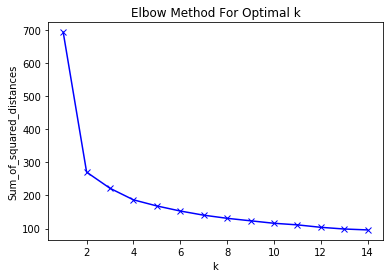

In [176]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [177]:
km = KMeans(n_clusters=2)
km = km.fit(x_scaled)

In [178]:
x["Cluster"] = km.predict(x_scaled)

In [179]:
x.groupby("Cluster").mean()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
Cluster,,,,,,,,,
0,2013.755800,48495.167674,3.575377,1.0,1.203502,15.267928,2173.156616,5.097152,21.245069
1,2012.833112,61384.382205,3.466985,0.0,1.246369,18.488399,1481.811712,5.378338,5.285795


- Masing-masing cluster memili ciri khas tersendiri.
- Cluster 0 memiliki ciri khas mobil dengan transmisi automatic, mesin dengan cc yang besar serta harga yang mahal
- Cluster 1 memiliki ciri khas sebaliknya yaitu transmisi manual, mesin dengan cc yang lebih rendah, dan harga yang jauh lebih murah

In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x.drop("Cluster",axis=1))
pDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [181]:
pDf["cluster"] = x["Cluster"] 

In [183]:
x_scaled["Cluster"] = x["Cluster"]

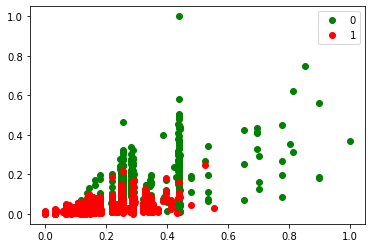

In [184]:
plt.plot(x_scaled["Engine"][x_scaled["Cluster"]==0], x_scaled["Price"][x_scaled["Cluster"]==0], "go", label="0")
plt.plot(x_scaled["Engine"][x_scaled["Cluster"]==1], x_scaled["Price"][x_scaled["Cluster"]==1], "ro", label="1")
plt.legend()

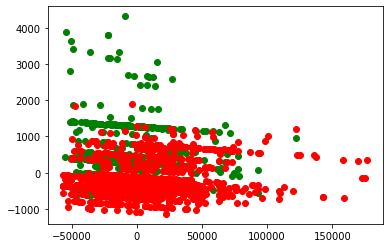

In [185]:
plt.plot(pDf["pc1"][pDf["cluster"]==0], pDf["pc2"][pDf["cluster"]==0], "go")
plt.plot(pDf["pc1"][pDf["cluster"]==1], pDf["pc2"][pDf["cluster"]==1], "ro")